Total anomalies detected: 1629


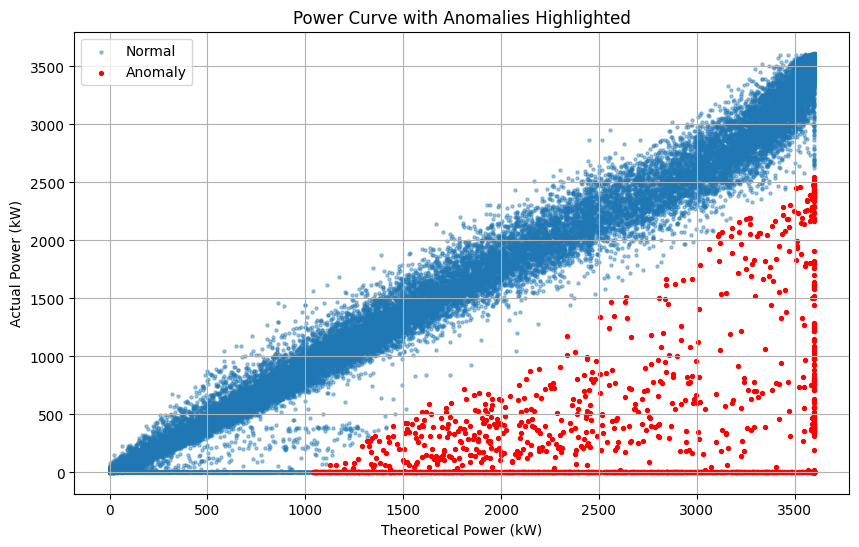

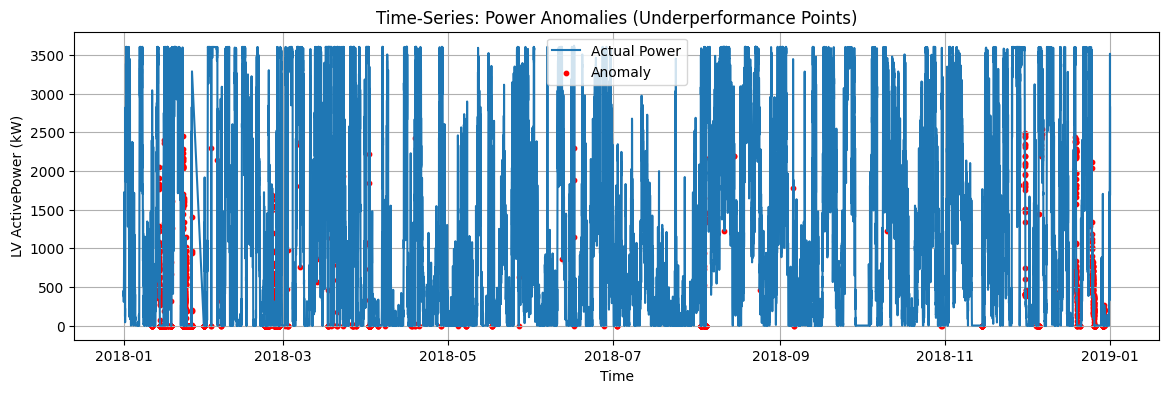

Anomaly file saved:power_anomalies.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('T1.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')
df = df.set_index('Date/Time')

# Rename for easier access
df = df.rename(columns={
    'LV ActivePower (kW)': 'power',
    'Wind Speed (m/s)': 'wind_speed',
    'Theoretical_Power_Curve (KWh)': 'theoretical',
    'Wind Direction (°)': 'wind_dir'
})

# Keep only needed
df = df[['power','wind_speed','theoretical']]

# ------------------------------------------
# 1. Compute Performance Deviation
# ------------------------------------------

df['deviation'] = df['theoretical'] - df['power']   # positive → underperformance

# Normalize deviation (for anomaly scoring)
df['deviation_norm'] = (df['deviation'] - df['deviation'].mean()) / df['deviation'].std()

# ------------------------------------------
# 2. Detect anomalies
# Rule: deviation_norm > 2.0 standard deviations
# ------------------------------------------

threshold = 2.0
df['anomaly'] = df['deviation_norm'] > threshold

# Count anomalies
print("Total anomalies detected:", df['anomaly'].sum())

# ------------------------------------------
# 3. Plot: Power vs Theoretical with anomalies highlighted
# ------------------------------------------

plt.figure(figsize=(10,6))
plt.scatter(df['theoretical'], df['power'], s=5, alpha=0.4, label="Normal")
plt.scatter(df[df['anomaly']]['theoretical'], 
            df[df['anomaly']]['power'], 
            color='red', s=8, label="Anomaly")
plt.xlabel("Theoretical Power (kW)")
plt.ylabel("Actual Power (kW)")
plt.title("Power Curve with Anomalies Highlighted")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------
# 4. Plot time-series of anomaly points
# ------------------------------------------

plt.figure(figsize=(14,4))
plt.plot(df.index, df['power'], label='Actual Power')
plt.scatter(df[df['anomaly']].index, 
            df[df['anomaly']]['power'], 
            color='red', s=10, label='Anomaly')
plt.title("Time-Series: Power Anomalies (Underperformance Points)")
plt.xlabel("Time")
plt.ylabel("LV ActivePower (kW)")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------
# 5. Save anomaly table
# ------------------------------------------

df[df['anomaly']].to_csv('power_anomalies.csv')
print("Anomaly file saved:power_anomalies.csv")
